In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
# Example data
import pandas as pd

df = pd.read_csv('example_twitter_data_6k.csv', sep='\t', encoding='utf-8')
df.head(1)

,text,hashtags,retweet_count,favorite_count,sentiment
0,cognitive compute human artificialintelligence...,Human ArtificialIntelligence fintech insurtech...,26.0,32.0,0.0


In [255]:
# Example data - remake

def set_sent_class(sent):
    limit = 0.00
    if sent > limit:
        return 1 #'Positive'
    elif sent < (limit*-1):
        return -1 #'Negative'
    else:
        return 0 # 'Neutral'

df = pd.read_csv('example_twitter_data_6k.csv', sep='\t', encoding='utf-8')
df = df[(df.sentiment != 0)].copy(deep=True).reset_index(drop=True)
df['h_l'] = df.hashtags.apply(lambda x: len(str(x).split()))
df['sent_class'] = df.sentiment.apply(set_sent_class)

print('Shape:', df.shape)
df.head(1)

Shape: (3800, 7)


,text,hashtags,retweet_count,favorite_count,sentiment,h_l,sent_class
0,vanguardsw rt chboursin ai achieve human like ...,human-like skills,7.0,0.0,0.22,2,1


In [256]:
df.h_l.isna().value_counts()

False    3800
Name: h_l, dtype: int64

In [ ]:
# In progress

In [220]:
# Figure out data examples

# Data
df = pd.read_csv('https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv')
X = df[['horsepower']]
y = df['price']

display(df.loc[:,['price','horsepower']].head(1))

,price,horsepower
0,13495.0,111.0


linear model coeff (w): [0.04279391]
linear model intercept (b): 0.111
R-squared score (training): 0.021
R-squared score (test): 0.022


<IPython.core.display.Javascript object>


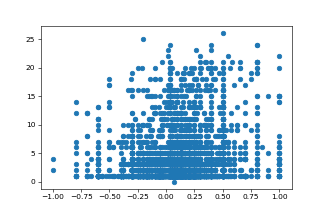

In [282]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Data
#df = pd.read_csv('https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv')
#X = df[['horsepower']]
#y = df['price']
X = df[['h_l']]
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Feature Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model:
LR = LinearRegression()
linreg = LR.fit(X_train_scaled, y_train)

# Predict:
#

# Tune:
#

# Dataset Description
print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test_scaled, y_test)))

plt.scatter(y, X)
plt.show()

In [200]:
# Example


%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv')
X = df[['horsepower']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

### intercept & coefficient, R-squared for training & test data set
print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [157.09522969]
linear model intercept (b): -3574.121
R-squared score (training): 0.623
R-squared score (test): 0.666


In [ ]:
# Get right data from data frame
X = df.loc[:,['retweet_count']] # 'retweet_count', 'sentiment'
y = df.sentiment # retweet_count

# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) # , train_size=0.8, test_size=0.2)

# Pick alghoritm 
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

# Fit model
lr.fit(X_train, y_train)

### intercept & coefficient, R-squared for training & test data set
print('linear model coeff (w): {}'.format(lr.coef_))
print('linear model intercept (b): {:.3f}'.format(lr.intercept_))
print('R-squared score (training): {:.3f}'.format(lr.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lr.score(X_test, y_test)))

predictions = lr.predict(X_test)

plt.scatter(y_test, predictions)

## Polynomial Regression

In [285]:
%matplotlib notebook
import numpy as np  # ?
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  # ?
from sklearn.model_selection import train_test_split


# Get right data from data frame
X = df.loc[:,['h_l']] # 'retweet_count', 'sentiment'
y = df.sentiment # retweet_count

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 0)

# Polynomial regression def
linreg = LinearRegression().fit(X_train, y_train)

### intercept & coefficient, R-squared for training & test data set
print('(poly deg 2) linear model coeff (w):\n{}'.format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'.format(linreg.score(X_test, y_test)))


# Polynomial Regression model with a regularization penalty.
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 0)
linreg = Ridge().fit(X_train, y_train)

### intercept & coefficient, R-squared for training & test data set
print('(poly deg 2 + ridge) linear model coeff (w):\n{}'.format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

(poly deg 2) linear model coeff (w):
[0.00000000e+00 7.65700227e-03 9.99999343e-05]
(poly deg 2) linear model intercept (b): 0.076
(poly deg 2) R-squared score (training): 0.021
(poly deg 2) R-squared score (test): 0.022

(poly deg 2 + ridge) linear model coeff (w):
[0.         0.00765576 0.00010006]
(poly deg 2 + ridge) linear model intercept (b): 0.076
(poly deg 2 + ridge) R-squared score (training): 0.021
(poly deg 2 + ridge) R-squared score (test): 0.022


## Lasso Regression

In [ ]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Get right data from data frame
X = df.loc[:,['retweet_count']] # 'retweet_count', 'sentiment'
y = df.sentiment # retweet_count

from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)



### Intercept & coefficient, # of non-zero features & weights, R-squared for training & 
### test data set
print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff:{}'.format(linlasso.coef_))
print('\nNon-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))
print('\nR-squared score (training): {:.3f}'.format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'.format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X), linlasso.coef_)), key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))
        
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

# Regularization parameter alpha on R-squared
for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'.format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

## Logistic Regression

In [ ]:

# Get right data from data frame
X = df.loc[:,['retweet_count']] # 'retweet_count', 'sentiment'
y = df.sentiment # retweet_count

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

# Logistic regression regularization: C parameter
for this_C in [0.1, 1, 100]:
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    print('Logistic Regression with C = {}'.format(this_C))
    print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
    print('Accuracy of Logistic regression classifier on test set: {:.2f}\n'.format(clf.score(X_test, y_test)))

## Naive Bayes classifiers

In [ ]:
%matplotlib notebook
import pandas as pd
from sklearn.model_selection import train_test_split

# Get right data from data frame
X = df.loc[:,['retweet_count', 'retweet_count']] # 'retweet_count', 'sentiment'
y = df.sentiment # retweet_count

from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'.format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'.format(nbclf.score(X_test, y_test)))

## Linear Support Vector Machines

In [ ]:
%matplotlib notebook
import pandas as pd
from sklearn.model_selection import train_test_split

### Data Input Example 
df = pd.read_csv('https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv')

X = df[['horsepower']]
y = df['price']

X_2 = df[['horsepower', 'normalized-losses']]
y_2 = df['price']

from sklearn.svm import SVC
 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#C parameter
this_C = 1.0

# Linear SVM regularization: C parameter
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
print('Linear SVC, C = {:.3f}'.format(this_C))
print('Accuracy of Linear SVC classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

# LinearSVC with M classes generates M one vs rest classifiers

from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)


## Kernelized Support Vector Machines

In [ ]:
%matplotlib notebook
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# Get right data from data frame
X = df.loc[:,['retweet_count']] # 'retweet_count', 'sentiment'
y = df.sentiment # retweet_count

from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)



# The default SVC kernel is radial basis function (RBF)
clf = SVC().fit(X_train, y_train)

print('Accuracy of RBF-kernel SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))

### THIS MIGHT TAKE A WHILE
# # Compare decision boundries with polynomial kernel, degree = 3
# clf = SVC(kernel = 'poly', degree = 3).fit(X_train, y_train)

# print('Accuracy of poly-kernel SVC on training set: {:.2f}'
#      .format(clf.score(X_train, y_train)))
# print('Accuracy of poly-kernel SVC on test set: {:.2f}'
#      .format(clf.score(X_test, y_test)))


# Support Vector Machine with RBF kernel: gamma paramete

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

for this_gamma in [0.00001, 100]:
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    print('SVM (RBF) with gamma = {}'.format(this_gamma))
    print('Accuracy of SVM (RBF) classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
    print('Accuracy of SVM (RBF) classifier on test set: {:.2f}\n'.format(clf.score(X_test, y_test)))
    
## Support Vector Machine with RBF kernel: using both C and gamma parameter

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

for this_gamma in [0.01, 1, 5]:
    
    for this_C in [0.1, 1, 15, 250]:
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma, C = this_C).fit(X_train, y_train)
        print('SVM (RBF) with gamma = {} and C = {}'.format(this_gamma, this_C))
        print('Accuracy of SVM (RBF) classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
        print('Accuracy of SVM (RBF) classifier on test set: {:.2f}\n'.format(clf.score(X_test, y_test)))
        
#  SVMs with normalized data (feature preprocessing using minmax

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Cars dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'.format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'.format(clf.score(X_test_scaled, y_test)))

In [ ]:
####################################

## Random Forest

In [ ]:
%matplotlib notebook
import pandas as pd
from sklearn.model_selection import train_test_split

### Data Input
# df = 

### Defining Variables  
# X = 
# y = 

### Data Input Example 
df = pd.read_csv('https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv')

X = df[['horsepower', 'normalized-losses']]
y = df['price']

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = RandomForestClassifier(max_features = 2, random_state = 0).fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))


## Decision Trees

In [ ]:
%matplotlib notebook
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv')

X = df[['horsepower', 'normalized-losses']]
y = df['price']


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8, random_state = 0).fit(X_train, y_train).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

## Gradient-boosted Decision Trees

In [ ]:
%matplotlib notebook
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

### Data Input
# df = 

### Defining Variables  
# X = 
# y = 

### Data Input Example 
df = pd.read_csv('https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv')

X = df[['horsepower', 'normalized-losses']]
y = df['price']

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#### COMPARE YOUR MODELS ####

# Model with the learning rate = 0.1 and max_dept = 3 (default settings)
clf = GradientBoostingClassifier(random_state = 0).fit(X_train, y_train)

print('Car dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'.format(clf.score(X_test, y_test)))

# Model with the learning rate = 0.01 and max_dept = 2
clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0).fit(X_train, y_train)

print('Car dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

## Ridge Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Get right data from data frame
X = df.loc[:,['retweet_count']] # 'retweet_count', 'sentiment'
y = df.sentiment # retweet_count

from sklearn.linear_model import Ridge

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)
# feature normalization
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ridge regression def
linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

### intercept & coefficient, # of non-zero features & weights, R-squared for training & test data set
print('Ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('Ridge regression linear model coeff: {}\n'.format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'.format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

# Regularization parameter alpha on R-squared

print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))


## Neural Networks - Regression

In [ ]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Data Input
# df = 

### Defining Variables  
# X = 
# y = 

### Data Input Example 
df = pd.read_csv('https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv')

X = df[['horsepower', 'normalized-losses']]
y = df['price']

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

# normalized
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model 
clf = MLPRegressor(hidden_layer_sizes = [100, 100], alpha = 5.0, random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Accuracy of NN regressor on training set: {:.2f}'.format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN regressor on test set: {:.2f}'.format(clf.score(X_test_scaled, y_test)))


##### Accuracy with different activation functions and regularization parameter alpha
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# normalized
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Accuracy with different activation functions and regularization parameter alpha
for thisactivation in ['tanh', 'relu']:
    for thisalpha in [0.0001, 1.0, 100]:
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        print('Accuracy of NN regressor with activation funtion = {} and alpha = {} on training set: {:.2f}'.format(thisactivation, thisalpha, clf.score(X_train_scaled, y_train)))
        print('Accuracy of NN regressor on test set: {:.2f}\n'.format(clf.score(X_test_s

## Neural Networks - Classification¶

In [ ]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Data Input
# df = 

### Defining Variables  
# X = 
# y = 

### Data Input Example 
df = pd.read_csv('https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv')

X = df[['horsepower', 'normalized-losses']]
y = df['price']

from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

nnclf = MLPClassifier(hidden_layer_sizes = 2, solver='lbfgs', random_state = 0).fit(X_train, y_train)

print('Accuracy of NN Classifier on training set: {:.2f}'.format(nnclf.score(X_train, y_train)))
print('Accuracy of NN Classifier on test set: {:.2f}'.format(nnclf.score(X_test, y_test)))

# Accuracy with different hidden layers

for units in [1, 10, 100]:
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    print('Accuracy of NN Classifier with hidden layers = {} on training set: {:.2f}'.format(units, nnclf.score(X_train, y_train)))
    print('Accuracy of NN Classifier with hidden layers = {} on test set: {:.2f}\n'.format(units, nnclf.score(X_test, y_test)))
    

# Accuracy with a regularization parameter: alpha
for this_alpha in [0.01, 0.1, 1.0, 5.0]:
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    print('Accuracy of NN Classifier with alpha = {} on training set: {:.2f}'.format(units, nnclf.score(X_train, y_train)))
    print('Accuracy of NN Classifier with alpha = {} on test set: {:.2f}\n'.format(units, nnclf.score(X_test, y_test)))
    
    
# Choices of activation function - tanh, logistic and relu

# plot tanh, logistic and relu #Activation functions representation

xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

# The effect of different choices of activation function

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for this_activation in ['logistic', 'tanh', 'relu']:
    nnclf = MLPClassifier(solver='lbfgs', activation = this_activation,
                         alpha = 0.1, hidden_layer_sizes = [10, 10],
                         random_state = 0).fit(X_train, y_train)
    print('Accuracy of NN Classifier with {} activation function on training set: {:.2f}'.format(this_activation, nnclf.score(X_train, y_train)))
    print('Accuracy of NN Classifier with {} activation function on test set: {:.2f}\n'.format(this_activation, nnclf.score(X_test, y_test)))


#  Accuracy with different activation functions and regularization parameter alpha

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


# Accuracy with different activation functions and regularization parameter alpha
for thisactivation in ['tanh', 'relu']:
    for thisalpha in [0.0001, 1.0, 100]:
        nnclf = MLPClassifier(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        print('Accuracy of NN Classifier with activation funtion = {} and alpha = {} on training set: {:.2f}'.format(thisactivation, thisalpha, nnclf.score(X_train, y_train)))
        print('Accuracy of NN Classifier with activation funtion = {} and alpha = {} on test set: {:.2f}\n'.format(thisactivation, thisalpha, nnclf.score(X_test, y_test)))
        

In [ ]:
https://machinelearningmastery.com/make-predictions-scikit-learn/
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
https://towardsdatascience.com/linear-regression-using-python-ce21aa90ade6
https://www.thelearningmachine.ai/logistic?fbclid=IwAR1R22vWdtN-LrVl9ccatmHVBDZq8KTFllXKyGqosGT_M0L5ldoClcfNpbY
https://github.com/5x12/ML-Cookbook/blob/master/Classification/logistic_regression.ipynb

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

model = LinearRegression()
model.fit(x_training_data, y_training_data)
prediction = model.predict(your_x_data)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)
 
# Calculating R2 Score
r2_score = reg.score(X, Y)
 
print(r2_score)


from sklearn.linear_model import LinearRegression
>>> lin_reg = LinearRegression()
>>> lin_reg.fit(X, y)
>>> lin_reg.intercept_, lin_reg.coef_
(array([ 4.21509616]), array([[ 2.77011339]]))
>>> lin_reg.predict(X_new)


# Logistic Regression

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
print(X)
print(y)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
 
print(cm)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)